In [1]:
### To get float64 support, run:

#from jax import config
#config.update("jax_enable_x64", True)

Import relevant libraries:

In [7]:
import jax.numpy as jnp

from ripple.waveforms import IMRPhenomXAS
from ripple import ms_to_Mc_eta

import matplotlib.pyplot as plt

Code taken from the ripple github overview page:

In [3]:
# Get a frequency domain waveform
# source parameters

m1_msun = 20.0 # In solar masses
m2_msun = 19.0
chi1 = 0.5 # Dimensionless spin
chi2 = -0.5
tc = 0.0 # Time of coalescence in seconds
phic = 0.0 # Time of coalescence
dist_mpc = 440 # Distance to source in Mpc
inclination = 0.0 # Inclination Angle

# The PhenomD waveform model is parameterized with the chirp mass and symmetric mass ratio
Mc, eta = ms_to_Mc_eta(jnp.array([m1_msun, m2_msun]))

# These are the parametrs that go into the waveform generator
# Note that JAX does not give index errors, so if you pass in the
# the wrong array it will behave strangely
theta_ripple = jnp.array([Mc, eta, chi1, chi2, dist_mpc, tc, phic, inclination])

# Now we need to generate the frequency grid
f_l = 24
f_u = 512
del_f = 0.01
fs = jnp.arange(f_l, f_u, del_f)
f_ref = f_l

# And finally lets generate the waveform!
hp_ripple, hc_ripple = IMRPhenomXAS.gen_IMRPhenomXAS_hphc(fs, theta_ripple, f_ref)

# Note that we have not internally jitted the functions since this would
# introduce an annoying overhead each time the user evaluated the function with a different length frequency array
# We therefore recommend that the user jit the function themselves to accelerate evaluations. For example:

import jax

@jax.jit
def waveform(theta):
    return IMRPhenomXAS.gen_IMRPhenomXAS_hphc(fs, theta)

In [5]:
hp_ripple.real

Array([-3.0477556e-23, -2.8235667e-23, -2.5858128e-23, ...,
       -5.6888334e-25, -5.6879021e-25, -5.6870072e-25], dtype=float32)

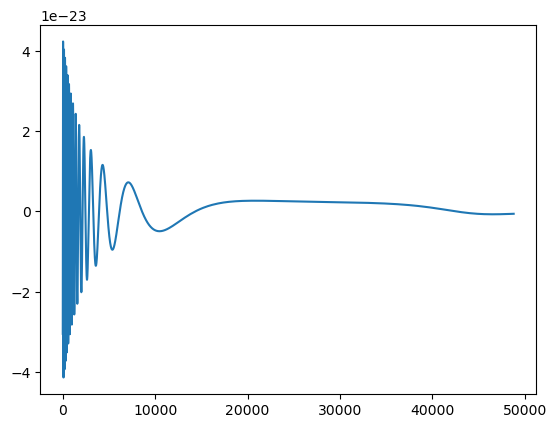

In [8]:
plt.plot(hp_ripple.real)
plt.show()